Import pandas and numpy packages and give them abbreviations for easier callback

In [1]:
import pandas as pd
import numpy as py

Read in my data file in .csv format

In [2]:
data = pd.read_csv("/Users/brycebangerter/Documents/NBA_player_of_the_week.csv")

View first 10 rows of data

In [3]:
data.head(10)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,14-Apr-85,1978,5-Jun,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,7-Apr-85,1982,6-Jun,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,1-Apr-85,1979,6-Jun,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0
3,37,NaN,24-Mar-85,1969,2-Jul,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225,1.0
4,28,NaN,17-Mar-85,1978,9-Jun,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220,1.0
5,26,NaN,10-Mar-85,1980,4-Jun,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190,1.0
6,24,NaN,3-Mar-85,1982,3-Jun,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170,1.0
7,25,NaN,24-Feb-85,1981,6-Jun,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232,1.0
8,25,NaN,17-Feb-85,1979,9-Jun,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255,1.0
9,25,NaN,3-Feb-85,1982,7-Jun,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200,1.0


Describe the data to see if there are any odd values that cast doubt on cleanliness/formatting of data

In [4]:
data.describe()

,Age,Draft Year,Season short,Seasons in league,Real_value
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,0.667686
std,3.402354,9.381369,9.426976,3.271995,0.236163
min,19.000000,1969.000000,1985.000000,0.000000,0.500000
25%,24.000000,1990.000000,1997.000000,3.000000,0.500000
50%,26.000000,1998.000000,2006.000000,6.000000,0.500000
75%,29.000000,2004.000000,2012.000000,8.000000,1.000000
max,40.000000,2016.000000,2018.000000,17.000000,1.000000


Change the column names to have underscores instead of spaces for easier callback

In [5]:
data.rename(index=str, columns={'Draft Year':'Draft_Year', 'Season short': 'Season_Short', 'Seasons in league': 'Seasons_In_League', 'Height': 'Height_In', 'Weight': 'Weight_lbs'}, inplace=True)

strip the label "kg" at the end of some of the data inputs for weight

In [6]:
data['Weight_lbs'] = data['Weight_lbs'].map(lambda x: x.rstrip('kg'))

I wanted to drop Conference and real value columns because they don't matter. 

In [7]:
data.drop(data.columns[[1,4,12]], axis=1, inplace=True)

View data table to see that all changes have been made correctly

In [8]:
data

,Age,Date,Draft_Year,Player,Position,Season,Season_Short,Seasons_In_League,Team,Weight_lbs
0,29,14-Apr-85,1978,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189
1,23,7-Apr-85,1982,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205
2,28,1-Apr-85,1979,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220
3,37,24-Mar-85,1969,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225
4,28,17-Mar-85,1978,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220
5,26,10-Mar-85,1980,Darrell Griffith,SG,1984-1985,1985,4,Utah Jazz,190
6,24,3-Mar-85,1982,Sleepy Floyd,PG,1984-1985,1985,2,Golden State Warriors,170
7,25,24-Feb-85,1981,Mark Aguirre,SF,1984-1985,1985,3,Dallas Mavericks,232
8,25,17-Feb-85,1979,Magic Johnson,PG,1984-1985,1985,5,Los Angeles Lakers,255
9,25,3-Feb-85,1982,Dominique Wilkins,SF,1984-1985,1985,2,Atlanta Hawks,200


Want to see what type (string, integer) each column's data are

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1145 entries, 0 to 1144
Data columns (total 10 columns):
Age                  1145 non-null int64
Date                 1145 non-null object
Draft_Year           1145 non-null int64
Player               1145 non-null object
Position             1145 non-null object
Season               1145 non-null object
Season_Short         1145 non-null int64
Seasons_In_League    1145 non-null int64
Team                 1145 non-null object
Weight_lbs           1145 non-null object
dtypes: int64(4), object(6)
memory usage: 98.4+ KB


Convert Weights from string to integer so I can manipulate it

In [10]:
data['Weight_lbs'] = data['Weight_lbs'].astype(int)

Defining a function to convert from kg to pounds on the weights in 2017 and 2018 since they were the only years listed as kg when all the other years were listed in pounds. Then I ran the function and converted the data type to integer because the output turned it into a float.

In [11]:
def kg_to_lbs(row):
    if (row["Season_Short"] >= 2017):
        return (row["Weight_lbs"] * 2.20462)
    else:
        return row["Weight_lbs"]

In [12]:
data['Weight_lbs'] = data.apply(kg_to_lbs, axis=1)

In [13]:
data['Weight_lbs'] = data['Weight_lbs'].astype(int)

Wanted to see the bottom and top rows of the data to see if the function performed correctly

In [14]:
data.tail()

,Age,Date,Draft_Year,Player,Position,Season,Season_Short,Seasons_In_League,Team,Weight_lbs
1140,28,6-Nov-17,2009,James Harden,SG,2017-2018,2018,8,Houston Rockets,220
1141,25,30-Oct-17,2013,Victor Oladipo,G,2017-2018,2018,4,Indiana Pacers,209
1142,27,30-Oct-17,2010,DeMarcus Cousins,C,2017-2018,2018,7,New Orleans Pelicans,268
1143,23,23-Oct-17,2013,Giannis Antetokounmpo,F,2017-2018,2018,4,Milwaukee Bucks,222
1144,28,23-Oct-17,2009,James Harden,SG,2017-2018,2018,8,Houston Rockets,220


In [15]:
data.head()

,Age,Date,Draft_Year,Player,Position,Season,Season_Short,Seasons_In_League,Team,Weight_lbs
0,29,14-Apr-85,1978,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189
1,23,7-Apr-85,1982,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205
2,28,1-Apr-85,1979,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220
3,37,24-Mar-85,1969,Kareem Abdul-Jabbar,C,1984-1985,1985,15,Los Angeles Lakers,225
4,28,17-Mar-85,1978,Larry Bird,SF,1984-1985,1985,5,Boston Celtics,220


With this function, I change the team names to their abbreviations. I also change outdated franchise names to their current franchise name. For example, the Washington Bullets became the Washington Wizards in 1997, so I renamed the Bullets data to be Wizards data so they would be counted and grouped together, since the franchise is the same. 

In [16]:
def abbreviation(row):
    if (row["Team"] == "Los Angeles Lakers"):
        return "LAL"
    elif (row["Team"] == "San Antonio Spurs"):
        return "SAS"
    elif (row["Team"] == "Cleveland Cavaliers"):
        return "CLE"
    elif (row["Team"] == "Miami Heat"):
        return "MIA"
    elif (row["Team"] == "Houston Rockets"):
        return "HOU"
    elif (row["Team"] == "Utah Jazz"):
        return "UTA"
    elif (row["Team"] == "Phoenix Suns"):
        return "PHX"
    elif (row["Team"] == "Golden State Warriors"):
        return "GSW"
    elif (row["Team"] == "Chicago Bulls"):
        return "CHI"
    elif (row["Team"] == "Orlando Magic"):
        return "ORL"
    elif (row["Team"] == "Boston Celtics"):
        return "BOS"
    elif (row["Team"] == "Oklahoma City Thunder"):
        return "OKC"
    elif (row["Team"] == "Denver Nuggets"):
        return "DEN"
    elif (row["Team"] == "Philadelphia Sixers"):
        return "PHI"
    elif (row["Team"] == "New York Knicks"):
        return "NYK"
    elif (row["Team"] == "Portland Trail Blazers"):
        return "POR"
    elif (row["Team"] == "Atlanta Hawks"):
        return "ATL"
    elif (row["Team"] == "New Jersey Nets"):
        return "BKN"
    elif (row["Team"] == "Toronto Raptors"):
        return "TOR"
    elif (row["Team"] == "Dallas Mavericks"):
        return "DAL"
    elif (row["Team"] == "Detroit Pistons"):
        return "DET"
    elif (row["Team"] == "Los Angeles Clippers"):
        return "LAC"
    elif (row["Team"] == "Milwaukee Bucks"):
        return "MIL"
    elif (row["Team"] == "Minnesota Timberwolves"):
        return "MIN"
    elif (row["Team"] == "Indiana Pacers"):
        return "IND"
    elif (row["Team"] == "Washington Wizards"):
        return "WAS"
    elif (row["Team"] == "Sacramento Kings"):
        return "SAC"
    elif (row["Team"] == "Seattle SuperSonics"):
        return "OKC"
    elif (row["Team"] == "Charlotte Hornets"):
        return "CHA"
    elif (row["Team"] == "New Orleans Hornets"):
        return "NOP"
    elif (row["Team"] == "Charlotte Bobcats"):
        return "CHA"
    elif (row["Team"] == "Memphis Grizzlies"):
        return "MEM"
    elif (row["Team"] == "Washington Bullets"):
        return "WAS"
    elif (row["Team"] == "Brooklyn Nets"):
        return "BKN"
    elif (row["Team"] == "New Orleans Pelicans"):
        return "NOP"
    else:
        return row["Team"]

In [17]:
data['Team'] = data.apply(abbreviation, axis=1)

I do various value counts for Teams (shows each team and how often they had a player that was player of the week), Seasons In League (shows how many players of the week were in a particular year of their career when they won the award), Age (shows how many players of the week were a particular age when they won the award), and Position (shows how many players of the week were a particular position).

In [18]:
data['Team'].value_counts()

LAL    71
SAS    61
OKC    61
CLE    59
MIA    57
HOU    56
UTA    47
PHX    45
ORL    44
CHI    44
GSW    44
BOS    43
DEN    41
PHI    37
BKN    36
NYK    36
POR    33
ATL    32
WAS    31
TOR    31
DAL    30
DET    29
LAC    27
MIN    26
CHA    26
MIL    26
IND    23
SAC    23
NOP    17
MEM     9
Name: Team, dtype: int64

In [19]:
data['Seasons_In_League'].value_counts()

4     141
5     140
6     137
3     120
7     108
8      99
2      96
9      78
1      49
10     43
12     34
11     34
0      26
13     14
14     11
16      7
15      6
17      2
Name: Seasons_In_League, dtype: int64

In [20]:
data['Age'].value_counts()

25    145
28    127
27    126
26    120
24    116
23    101
29     79
30     70
31     57
22     57
32     42
33     30
21     25
34     15
20     11
35      8
37      5
36      3
38      3
40      2
19      2
39      1
Name: Age, dtype: int64

In [21]:
data['Position'].value_counts()

G      178
SG     164
C      158
PF     139
F      125
PG     120
SF     119
FC      83
GF      47
F-C      9
G-F      3
Name: Position, dtype: int64

This shows the top 10 players with the most player of the week awards and the number of times they won it

In [22]:
data['Player'].value_counts().nlargest(10)

LeBron James        61
Kobe Bryant         33
Kevin Durant        26
Michael Jordan      25
Tim Duncan          23
Karl Malone         23
Allen Iverson       23
Shaquille O'Neal    20
Kevin Garnett       20
Dwyane Wade         19
Name: Player, dtype: int64

This shows the statistics of the data, such as mean, standard deviation, minimum and maximum for each continuous variable in the data

In [23]:
data.describe()

,Age,Draft_Year,Season_Short,Seasons_In_League,Weight_lbs
count,1145.000000,1145.000000,1145.000000,1145.000000,1145.000000
mean,26.772926,1997.244541,2004.211354,5.869869,225.970306
std,3.402354,9.381369,9.426976,3.271995,31.580663
min,19.000000,1969.000000,1985.000000,0.000000,150.000000
25%,24.000000,1990.000000,1997.000000,3.000000,205.000000
50%,26.000000,1998.000000,2006.000000,6.000000,225.000000
75%,29.000000,2004.000000,2012.000000,8.000000,250.000000
max,40.000000,2016.000000,2018.000000,17.000000,325.000000


I made box and whisker plots for various variables

In [24]:
bbox = data['Seasons_In_League'].plot(kind="box")

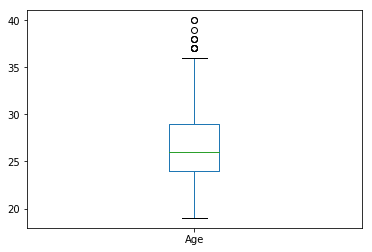

In [25]:
bbox = data['Age'].plot(kind="box")

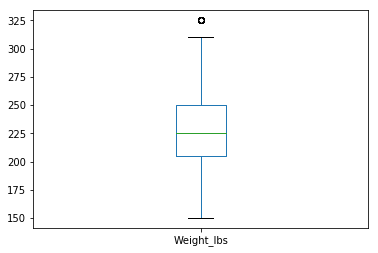

In [26]:
bbox = data['Weight_lbs'].plot(kind='box')

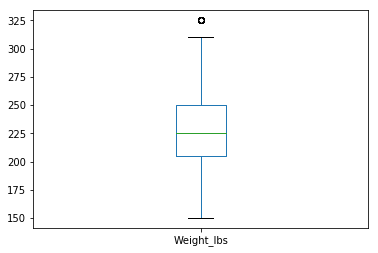

In [27]:
bbox = data['Weight_lbs'].plot(kind="box")

I import the data visualization packages I need

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Made a bar graph that shows the frequency of player of the week awards by team

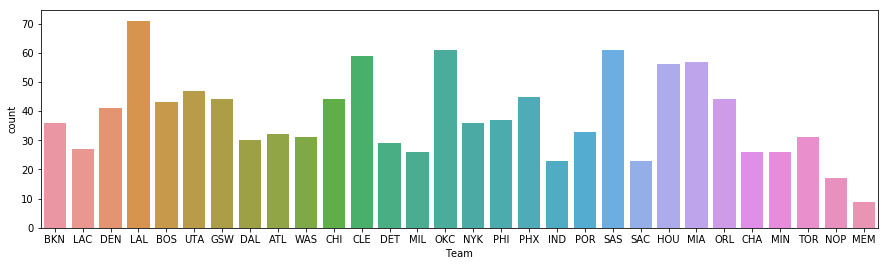

In [29]:
plt.figure(figsize=(15,4))
sns.countplot(x="Team", data=data)
plt.show()

Made a bar graph and histogram to represent the frequency/distribution of age for player of the week award recipients

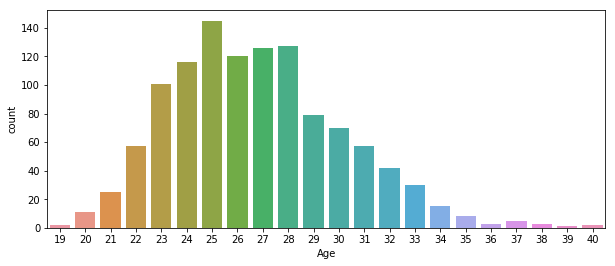

In [30]:
plt.figure(figsize=(10,4))
sns.countplot(x="Age", data=data)
plt.show()

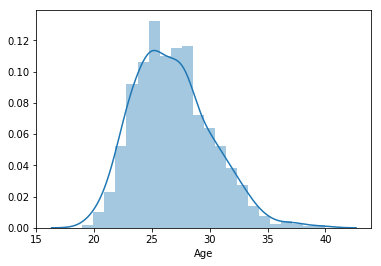

In [31]:
sns.distplot(data.Age)

Made a histogram to represent the distribution of seasons in the league for player of the week award recipients. It appears to be normally distributed such that players who are at the beginning or end of their career are players of the week less often than those in the "prime" years of the middle of their career. 

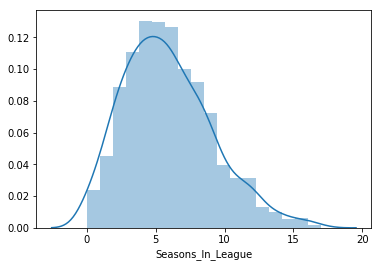

In [32]:
sns.distplot(data.Seasons_In_League)

Made a bar graph to show the frequency of positions that win player of the week

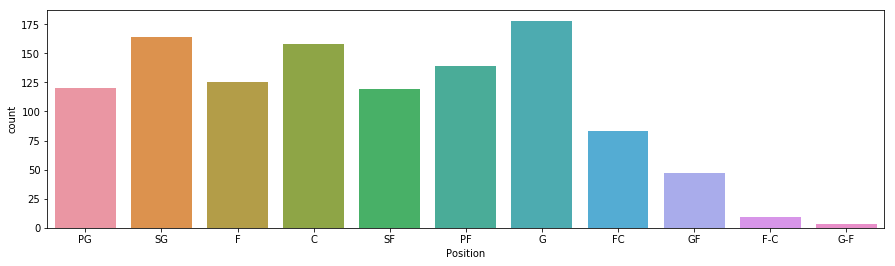

In [33]:
plt.figure(figsize=(15,4))
sns.countplot(x="Position", data=data)
plt.show()

Lastly, I wanted to show the distribution of weight for play of the week award recipients. We can see that it is unclear how normally distributed it is. This may be because certain weights might correlate to "overweight" guards or "underweight" forwards/centers. If you were over/underweight for your position, it is plausible that you would be less likely to be a player of the week. 

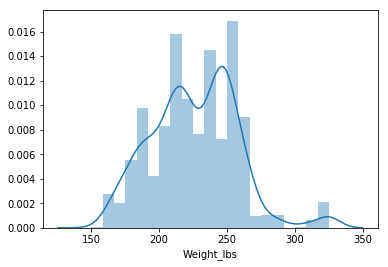

In [34]:
sns.distplot(data.Weight_lbs)